In [7]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [8]:
(x_train,y_train),(x_test,y_test)=keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
y_test.shape

(10000,)

In [11]:
y_train.shape

(60000,)

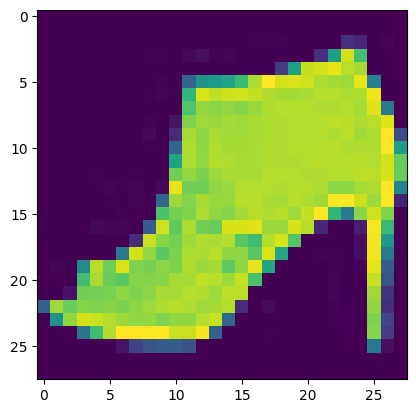

In [12]:
import matplotlib.pyplot as plt
plt.imshow(x_train[79])

In [13]:
x_train=x_train/255
x_test=x_test/255

In [14]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5189 - accuracy: 0.8200 - val_loss: 0.4227 - val_accuracy: 0.8487
Epoch 2/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3824 - accuracy: 0.8628 - val_loss: 0.3858 - val_accuracy: 0.8591
Epoch 3/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3445 - accuracy: 0.8743 - val_loss: 0.3499 - val_accuracy: 0.8716
Epoch 4/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3222 - accuracy: 0.8826 - val_loss: 0.3442 - val_accuracy: 0.8781
Epoch 5/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3016 - accuracy: 0.8891 - val_loss: 0.3374 - val_accuracy: 0.8823
Epoch 6/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2897 - accuracy: 0.8925 - val_loss: 0.3264 - val_accuracy: 0.8822
Epoch 7/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2749 - accuracy: 0.8984 - val_loss: 0.3312 - val_accuracy:

In [18]:
y_prob=model.predict(x_test)
y_pred=y_prob.argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8772

Text(0, 0.5, 'Calorie Burnage')

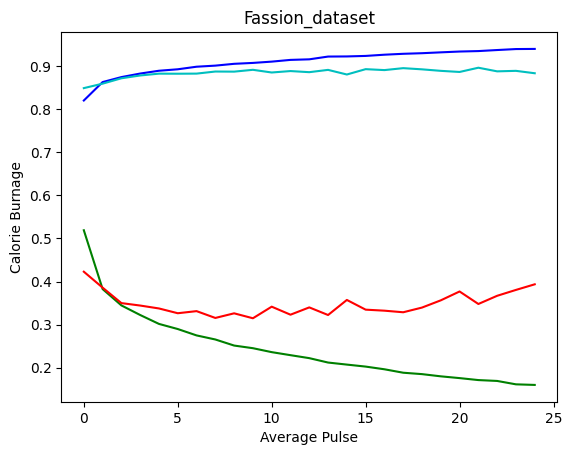

In [20]:
plt.plot(history.history['loss'],color='g')
plt.plot(history.history['val_loss'],color='r')
plt.plot(history.history['accuracy'],color='b')
plt.plot(history.history['val_accuracy'],color='c')
plt.title("Fassion_dataset", loc = 'center')
plt.xlabel("Average Pulse")
plt.ylabel("Calorie Burnage")

313/313 [==============================] - 1s 2ms/step


array([[1.6520156e-07, 4.7754922e-10, 2.5260090e-07, ..., 2.4841309e-03,
        3.8856998e-10, 9.9751478e-01],
       [1.8529512e-07, 4.6018611e-22, 9.9999422e-01, ..., 6.1521245e-22,
        1.0296030e-14, 7.1909820e-19],
       [6.5774324e-14, 9.9999994e-01, 2.6216416e-18, ..., 0.0000000e+00,
        1.9377075e-17, 3.7138793e-29],
       ...,
       [4.9584936e-09, 4.3568389e-18, 3.1578977e-14, ..., 1.1807479e-17,
        9.9999994e-01, 4.9792328e-19],
       [5.3580355e-13, 9.9999994e-01, 5.7749714e-13, ..., 9.7509456e-27,
        1.0516285e-09, 2.1799437e-18],
       [2.9731839e-09, 2.0591046e-11, 1.8201307e-10, ..., 3.0959200e-04,
        1.2380196e-05, 2.3976126e-08]], dtype=float32)

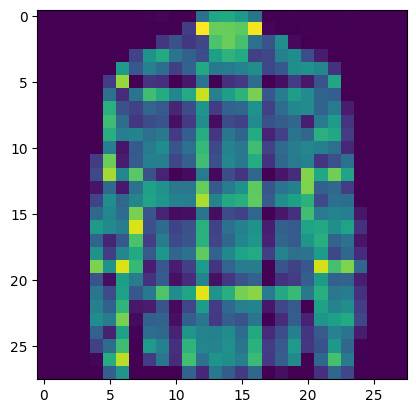

In [21]:
plt.imshow(x_test[7])
model.predict(x_test)